In [12]:
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import Point

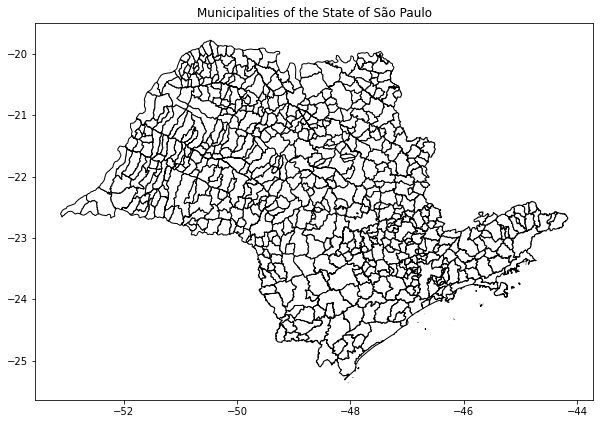

In [19]:
## Import shapefile and plot it
shape = gp.read_file('SP_municipios_2021/SP_Municipios_2021.shp')
fig, ax = plt.subplots(figsize = (10,10))
shape.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
plt.title('Municipalities of the State of São Paulo')
plt.show()

In [10]:
shape["lon"] = shape["geometry"].centroid.x
shape["lat"] = shape["geometry"].centroid.y
shape.head()

C:\Users\FREY\AppData\Local\Temp\ipykernel_6700\538619985.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape["lon"] = shape["geometry"].centroid.x
C:\Users\FREY\AppData\Local\Temp\ipykernel_6700\538619985.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape["lat"] = shape["geometry"].centroid.y


,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,lon,lat
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4...",-51.056802,-21.576682
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2...",-49.653283,-21.288685
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9...",-47.040320,-22.049956
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8...",-46.691678,-21.913710
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4...",-46.603672,-22.474823


In [14]:
## Convert pandas dataframe into geopandas
geo = [Point(xy) for xy in zip(shape['lon'], shape['lat'])]
CRS = {'init': 'epsg:4326'}
shape_gpd = gp.GeoDataFrame(shape, crs=CRS, geometry=geo)
shape_gpd.head()

C:\Users\FREY\anaconda3\envs\gp_environ\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry,lon,lat
0,3500105,Adamantina,SP,411.987,POINT (-51.05680 -21.57668),-51.056802,-21.576682
1,3500204,Adolfo,SP,211.055,POINT (-49.65328 -21.28869),-49.653283,-21.288685
2,3500303,Aguaí,SP,474.554,POINT (-47.04032 -22.04996),-47.040320,-22.049956
3,3500402,Águas da Prata,SP,142.673,POINT (-46.69168 -21.91371),-46.691678,-21.913710
4,3500501,Águas de Lindóia,SP,60.126,POINT (-46.60367 -22.47482),-46.603672,-22.474823


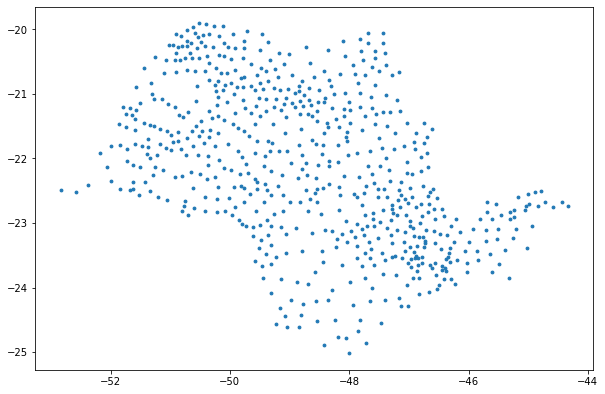

In [16]:
## Plotting centroids
fig, ax = plt.subplots(figsize = (10,10))
shape_gpd.plot(ax = ax, marker='o', markersize = 8)
plt.show()

In [26]:
## Select columns 
centroids = shape_gpd[['CD_MUN', 'NM_MUN', 'SIGLA', 'AREA_KM2', 'lon', 'lat']]
centroids

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,lon,lat
0,3500105,Adamantina,SP,411.987,-51.056802,-21.576682
1,3500204,Adolfo,SP,211.055,-49.653283,-21.288685
2,3500303,Aguaí,SP,474.554,-47.040320,-22.049956
3,3500402,Águas da Prata,SP,142.673,-46.691678,-21.913710
4,3500501,Águas de Lindóia,SP,60.126,-46.603672,-22.474823
...,...,...,...,...,...,...
640,3557006,Votorantim,SP,184.186,-47.406526,-23.579875
641,3557105,Votuporanga,SP,420.703,-49.989097,-20.457818
642,3557154,Zacarias,SP,319.056,-50.049414,-21.125467
643,3557204,Chavantes,SP,188.727,-49.726539,-23.046334


In [27]:
## Export
centroids.to_csv('centroids_munSP.csv')